In [1]:
import pandas as pd
import numpy as np

In [28]:
%matplotlib inline

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [30]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

### Load SF dataset 

In [37]:
df = pd.read_csv('datasci_course_materials/assignment6/sanfrancisco_incidents_summer_2014.csv', sep=',')

In [39]:
df.shape

(28993, 13)

In [40]:
df.head(5)

IncidntNum       Category                      Descript DayOfWeek  \
0   140734311          ARSON            ARSON OF A VEHICLE    Sunday   
1   140736317   NON-CRIMINAL                 LOST PROPERTY    Sunday   
2   146177923  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO    Sunday   
3   146177531  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO    Sunday   
4   140734220   NON-CRIMINAL                FOUND PROPERTY    Sunday   

         Date   Time PdDistrict Resolution                    Address  \
0  08/31/2014  23:50    BAYVIEW       NONE  LOOMIS ST / INDUSTRIAL ST   
1  08/31/2014  23:45    MISSION       NONE     400 Block of CASTRO ST   
2  08/31/2014  23:30   SOUTHERN       NONE   1000 Block of MISSION ST   
3  08/31/2014  23:30   RICHMOND       NONE        FULTON ST / 26TH AV   
4  08/31/2014  23:23   RICHMOND       NONE   800 Block of LA PLAYA ST   

            X          Y                               Location  \
0 -122.405647  37.738322  (37.7383221869053, -122.405646994567)   
1 -122.435012  37.761768  (37.7617677182954, -122.435012093789)   
2 -122.409795  37.780036  (37.7800356268394, -122.409795194505)   
3 -122.485263  37.772518  (37.7725176473142, -122.485262988324)   
4 -122.509895  37.772313  (37.7723131976814, -122.509895418239)   

             PdId  
0  14073431126031  
1  14073631771000  
2  14617792306244  
3  14617753106244  
4  14073422072000

# How do incidents vary by time of day

### Create new variable for storing hour of day 

In [ ]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

### Count crime over hour of day

In [62]:
g1 = df.groupby( ['Hour'] ).count()

### Bar plot  

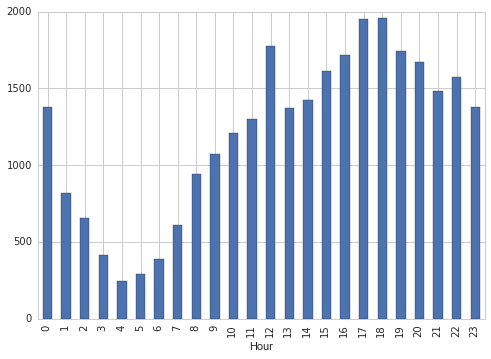

In [63]:
g1.plot.bar(y='IncidntNum', legend=False) 

### Crime is highest between [5pm-7pm] and between [12am-1pm] 

# Which incidents are most common in the evening

### Transforme Date to datetime data type

In [47]:
df.Date = pd.to_datetime(df['Date'], format='%m/%d/%Y') 

### Create new "Evening" variable : Evening = Hour between 6pm and 1am 

In [53]:
df['Evening'] = (df['Hour'] >= 18) & (df['Hour'] <= 23) | (df['Hour']==0)

In [59]:
df1 = df[(df['Hour'] >= 18) & (df['Hour'] <= 23) | (df['Hour']==0)]

In [60]:
g2 = df1.groupby( ['Category'] ).count()

In [74]:
g3 = g2.sort_values(by=['IncidntNum'])

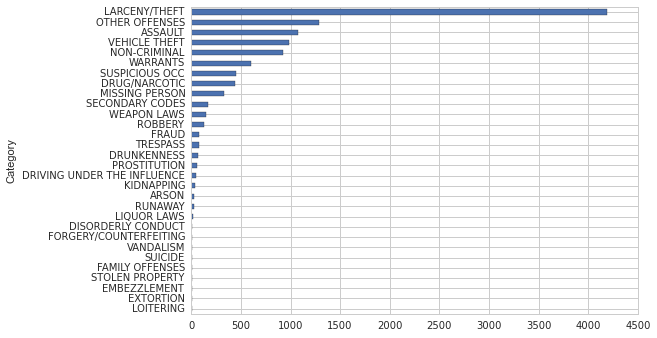

In [77]:
g3.plot.barh(y='IncidntNum', legend=False) 

### Most common incidents at evening are : LACENT/THEFT, OTHER OFFENSES, ASSAULT, VEHICULE THEFT, NON-CRIMINAL and WARRANT

# During what periods of the day are robberies most common?

In [79]:
df2 = df[(df['Category'] == 'ROBBERY') ]

In [81]:
g4 = df2.groupby( ['Hour'] ).count()

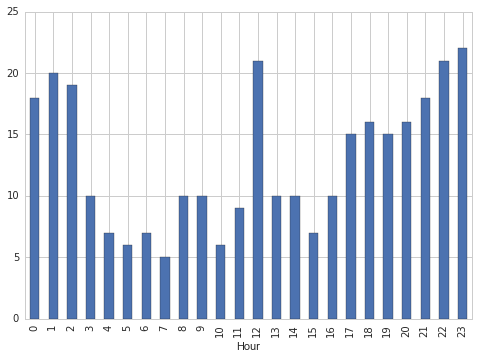

In [82]:
g4.plot.bar(y='IncidntNum', legend=False)

### ROBERRIES are most common at [12am-1pm] and between [10pm-12pm] 

#  How do incidents vary by neighborhood?